<a href="https://colab.research.google.com/github/YG2312/STOCK-PRICE-PREDICTION/blob/main/Stock_price_analysis_and_prediction(meta).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from keras.models import Sequential

from keras.layers import LSTM,Dropout,Dense
from numpy import asarray
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv( 'META.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-01,326.040009,333.450012,326.000000,329.980011,329.980011,31518900
1,2021-11-02,331.380005,334.790009,323.799988,328.079987,328.079987,28353000
2,2021-11-03,327.489990,332.149994,323.200012,331.619995,331.619995,20786500
3,2021-11-04,334.010010,337.269989,332.649994,335.850006,335.850006,22495300
4,2021-11-05,340.309998,346.790009,339.640015,341.130005,341.130005,26872800
...,...,...,...,...,...,...,...
247,2022-10-25,130.880005,138.350006,130.589996,137.509995,137.509995,38433200
248,2022-10-26,131.679993,135.550003,128.529999,129.820007,129.820007,82791500
249,2022-10-27,97.980003,102.500000,96.379997,97.940002,97.940002,232316600
250,2022-10-28,99.580002,100.849998,97.510002,99.199997,99.199997,95728200


In [ ]:
df.shape

(252, 7)

In [ ]:
z=df.describe()
z

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,217.901667,221.893373,214.079961,217.703492,217.703492,3.209100e+07
std,71.054915,71.671829,70.376185,71.033079,71.033079,2.254950e+07
min,97.980003,99.320000,92.599998,93.160004,93.160004,1.059330e+07
25%,165.084995,167.819996,161.345002,163.737503,163.737503,2.124468e+07
50%,195.860001,200.915000,191.385002,196.220001,196.220001,2.722005e+07
75%,297.772499,302.982498,291.395004,296.017510,296.017510,3.487305e+07
max,349.049988,353.829987,345.200012,347.559998,347.559998,2.323166e+08


In [ ]:
k=df.iloc[241: ,:]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


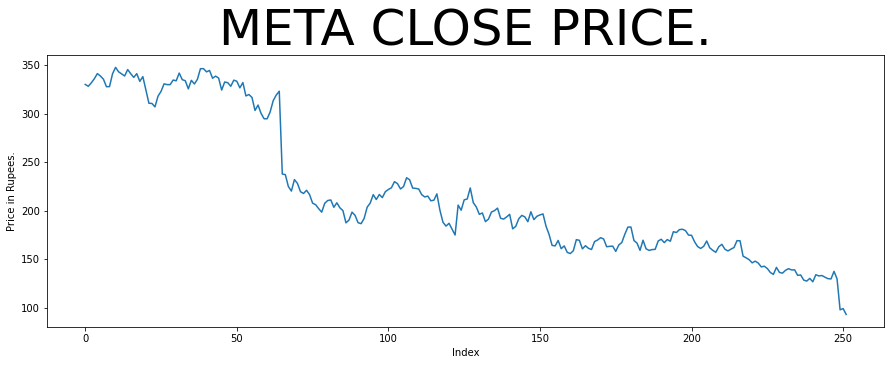

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('META CLOSE PRICE.', fontsize=50)
plt.xlabel('Index')
plt.ylabel('Price in Rupees.')
plt.show()

Text(0.5, 1.0, 'CONTINUITY GRAPH')

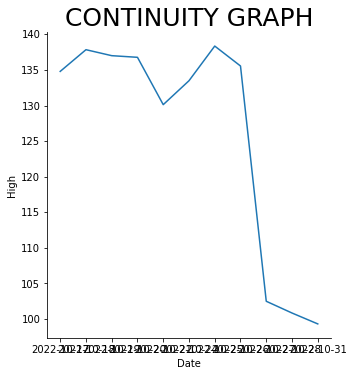

In [ ]:
sb.relplot(data=k, x="Date", y="High", kind="line")
plt.title('CONTINUITY GRAPH', fontsize=25)

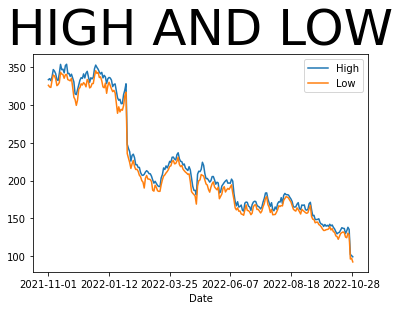

In [ ]:
df.plot(x="Date", y=["High", "Low"])
plt.title('HIGH AND LOW', fontsize=50)
plt.show()

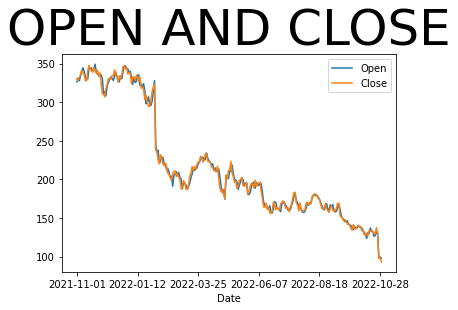

In [ ]:
df.plot(x="Date", y=["Open","Close"])
plt.title('OPEN AND CLOSE', fontsize=50)
plt.show()

Text(0.5, 1.0, 'OPEN VS CLOSE')

<Figure size 720x720 with 0 Axes>

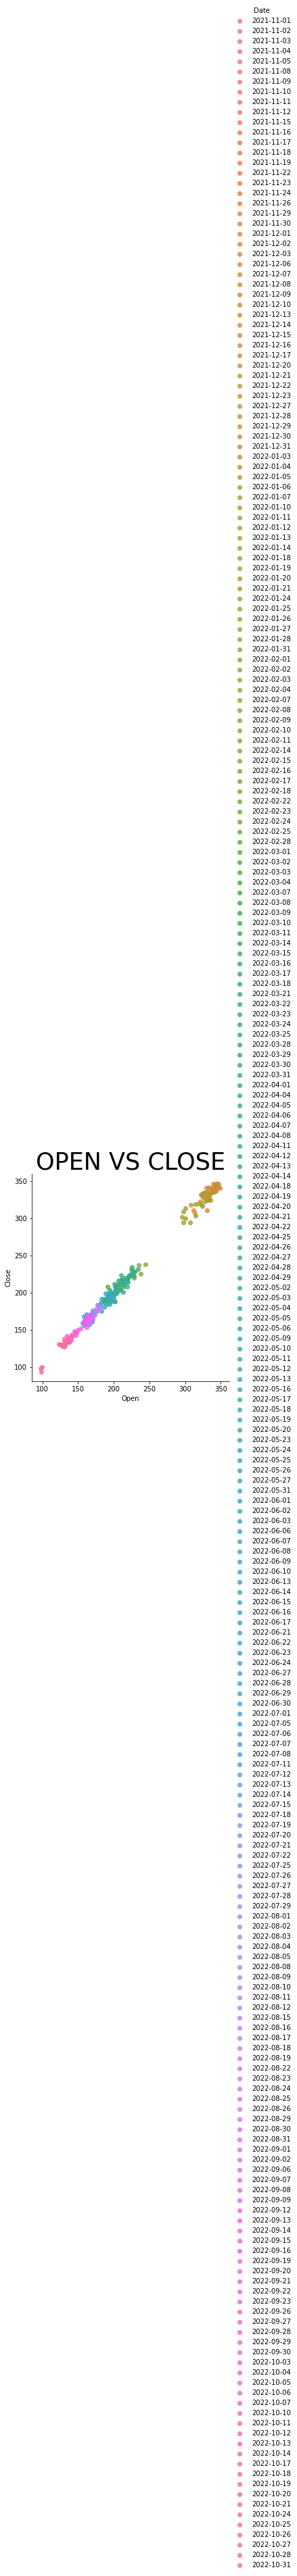

In [ ]:
plt.figure(figsize=(10,10))

sb.lmplot(data=k, x="Open", y="Close",hue="Date")

plt.title('OPEN VS CLOSE', fontsize=35)


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,217.901667,221.893373,214.079961,217.703492,217.703492,3.209100e+07
std,71.054915,71.671829,70.376185,71.033079,71.033079,2.254950e+07
min,97.980003,99.320000,92.599998,93.160004,93.160004,1.059330e+07
25%,165.084995,167.819996,161.345002,163.737503,163.737503,2.124468e+07
50%,195.860001,200.915000,191.385002,196.220001,196.220001,2.722005e+07
75%,297.772499,302.982498,291.395004,296.017510,296.017510,3.487305e+07
max,349.049988,353.829987,345.200012,347.559998,347.559998,2.323166e+08


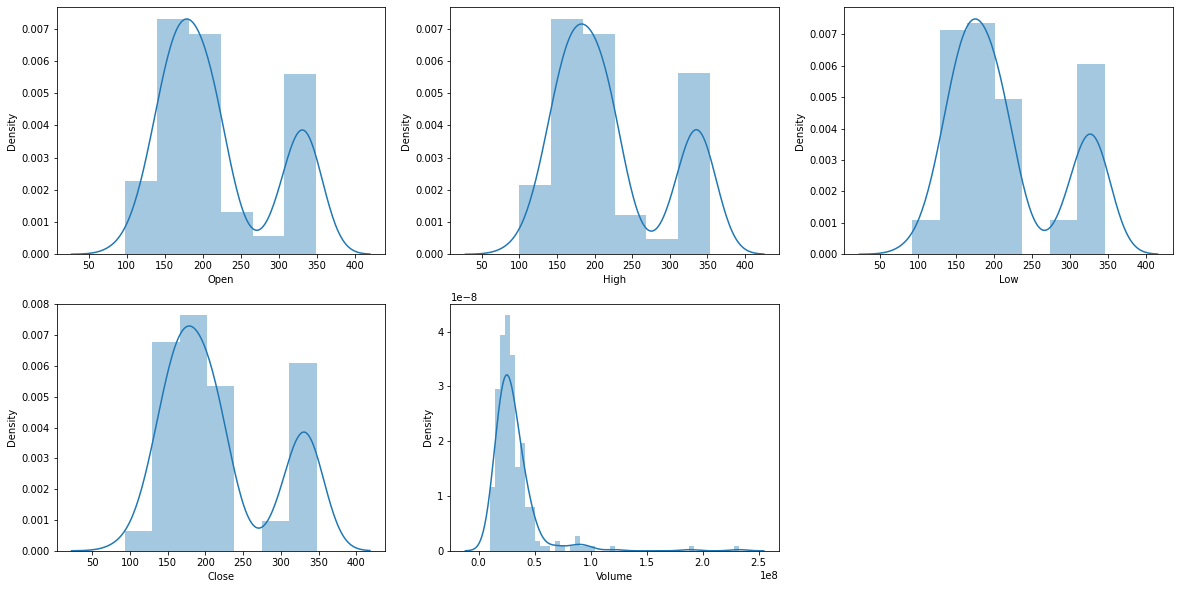

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])

plt.show()

In [ ]:
X = df[['High','Low','Open','Volume']].values
y = df['Close'].values
print(X)

[[3.33450012e+02 3.26000000e+02 3.26040009e+02 3.15189000e+07]
 [3.34790009e+02 3.23799988e+02 3.31380005e+02 2.83530000e+07]
 [3.32149994e+02 3.23200012e+02 3.27489990e+02 2.07865000e+07]
 ...
 [1.02500000e+02 9.63799970e+01 9.79800030e+01 2.32316600e+08]
 [1.00849998e+02 9.75100020e+01 9.95800020e+01 9.57282000e+07]
 [9.93200000e+01 9.25999980e+01 9.82200010e+01 1.21128500e+08]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
# Create Regression Model 
Model = LinearRegression()

# Train the model
Model.fit(X_train, y_train)
#Printing Coefficient
print(Model.coef_)

# Use model to make predictions
predicted = Model.predict(X_test) 
print(predicted)

[ 7.91930582e-01  8.63835307e-01 -6.55584636e-01  1.82033189e-09]
[226.3857713   94.30679152 138.11305123 157.21514281 190.07279238
 140.10020832 302.80822454  98.82204581 181.57403653 344.80568944
 134.47580538 161.07379032 215.37798867 166.53425594 218.21793926
 201.0336383  168.59621444 327.4499784  333.35109798 216.2849472
 138.31706882 323.53670947 214.05830169 157.39064383 185.24833746
 186.03075564 132.03039958 133.66174376 345.19353122 170.36743616
 135.73855793 335.37972392 309.81332059 157.44881492 157.69574768
 139.40412903 350.13489499 332.69445878 333.89515345 127.51934031
 166.99848058 338.44213694 201.63704178 229.14359723 334.40763953
 222.43368079 331.62743836 343.43383494 337.73923343 331.82225429
 136.07491911 201.99235869 215.42437514 191.02622257 170.21362334
 201.30500804 188.80590344 329.08777537 336.12035785 198.25647538
 170.98912968 195.09399156 162.84747242 167.06658851 332.69846782
 180.16093689 344.47373635 165.09181339 192.96814617 229.77331401
 192.636412

In [ ]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,224.910004,226.385771
1,93.160004,94.306792
2,138.610001,138.113051
3,158.750000,157.215143
4,186.630005,190.072792
5,140.410004,140.100208
6,300.149994,302.808225
7,99.199997,98.822046
8,183.169998,181.574037
9,341.130005,344.805689


In [ ]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.728380290553629
Mean Squared Error: 4.930673835587006
Root Mean Squared Error: 2.220512066075527


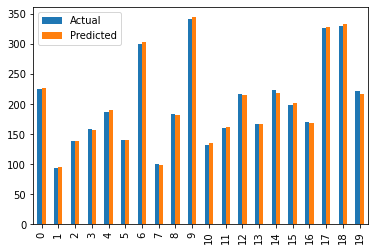

In [ ]:
graph = data1.head(20)
graph.plot(kind='bar')

In [ ]:
ka=data1.describe()
ka

,Actual,Predicted
count,76.000000,76.000000
mean,219.232764,219.193120
std,77.549339,77.505227
min,93.160004,94.306792
25%,162.207504,162.567482
50%,193.250000,192.802279
75%,316.307511,313.244168
max,346.220001,350.134895


Text(0.5, 1.0, 'ACTUAL VS PREDICTION')

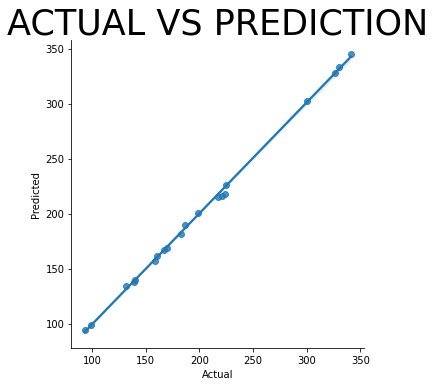

In [ ]:
sb.lmplot(data=graph, x="Actual", y="Predicted")
plt.title('ACTUAL VS PREDICTION', fontsize=35)

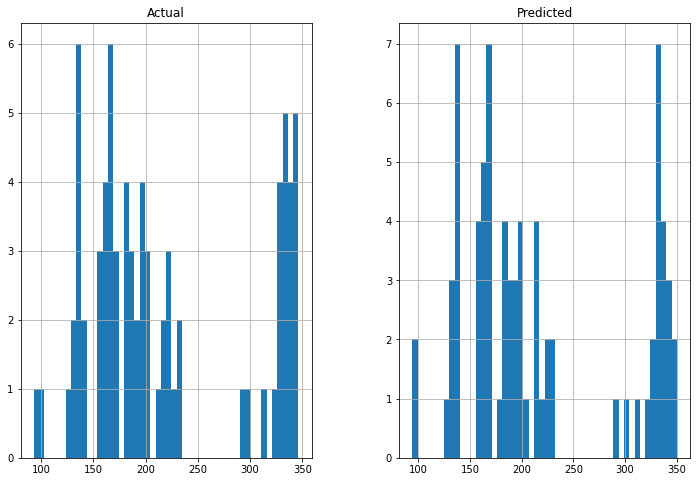

In [ ]:
data1.hist(bins=50, figsize=(12,8))
plt.show()